In [1]:
import pandas as pd
from trader_utils import BackTester, predictions_to_trades, get_xy
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import optimizers
import numpy as np

# from sklearn.preprocessing import StandardScaler
%matplotlib inline

Using TensorFlow backend.


In [8]:
class RNNTrader:
    def __init__(self):
        self.n = 1
        self.rolling_window = 21
        self.ticker = None
        self.timesteps = 7

    def fit(self, ticker, start_date, end_date): 
        self.ticker = ticker
        train_x, train_y = get_xy(ticker, start_date, end_date, self.rolling_window, self.n)
        num_examples = train_x.shape[0] - self.timesteps + 1
        num_features = train_x.shape[1]
        examples = np.zeros((num_examples, self.timesteps, num_features))
        for i in range(num_examples):
            examples[i,:,:] = train_x[i:i+self.timesteps,:]
        print(examples.shape)
        print(examples[0,:,:])
        print(examples[-1,:,:])   
        Y = train_y[self.timesteps-1:]
        print(Y.shape)
        print(Y[:10])
        model = Sequential()
        model.add(LSTM(64, input_shape=(self.timesteps, num_features), activation='relu', return_sequences=False))
        for i in range(4):
            model.add(Dense(64, activation='relu'))
            model.add(Dropout(.3))
        model.add(Dense(1, activation='tanh'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(examples, Y, epochs=500, verbose=1)
        self.model = model
    
    def generate_trades(self, start_date, end_date):
        test_x, _ = get_xy(self.ticker, start_date, end_date, self.rolling_window, self.n)
        print(test_x.shape)
        num_examples = test_x.shape[0] - self.timesteps + 1
        num_features = test_x.shape[1]
        examples = np.zeros((num_examples, self.timesteps, num_features))
        for i in range(num_examples):
            examples[i,:,:] = test_x[i:i+self.timesteps,:]
        print(examples.shape)
        print(examples[0,:,:])
        print(examples[-1,:,:])  
        predictions = self.model.predict_classes(examples)
        actual_start = self.rolling_window - 1 + self.timesteps - 1
        trades = predictions_to_trades(self.ticker, predictions, start_date, end_date, self.n, actual_start)
        return trades

In [9]:
#initialize
rnnt = RNNTrader()

In [10]:
#define test cases

# #test 1 case GOOG
# in_sd = pd.datetime(2011,1,1)
# in_ed = pd.datetime(2011,12,31)
# out_sd = pd.datetime(2012,1,1)
# out_ed = pd.datetime(2012,12,31)
# ticker = 'GOOG'

#test 2 case JPM
in_sd = pd.datetime(2008,1,1)
in_ed = pd.datetime(2009,12,31)
out_sd = pd.datetime(2010,1,1)
out_ed = pd.datetime(2011,12,31)
ticker = 'JPM'

# #test 3 case AMZN
# in_sd = pd.datetime(2008,1,1)
# in_ed = pd.datetime(2009,12,31)
# out_sd = pd.datetime(2010,1,1)
# out_ed = pd.datetime(2011,12,31)
# ticker = 'AMZN'

# #test 4 case AAPL
# in_sd = pd.datetime(2008,1,1)
# in_ed = pd.datetime(2009,12,31)
# out_sd = pd.datetime(2010,1,1)
# out_ed = pd.datetime(2011,12,31)
# ticker = 'AAPL'


In [11]:
#train model
rnnt.fit(ticker, in_sd, in_ed)    

(478, 7, 3)
[[1.11476134 1.0916123  2.50807752]
 [1.12694793 1.10040892 2.752357  ]
 [1.07438779 0.84434316 2.82571567]
 [1.01677633 0.57874948 2.79568503]
 [1.0103145  0.54897177 2.77127614]
 [1.03631261 0.67874763 2.68890241]
 [1.00268779 0.51373419 2.60039255]]
[[1.00621744 0.62276852 0.66973378]
 [1.00781841 0.65908359 0.64955369]
 [1.00069794 0.51706932 0.53935058]
 [1.00921176 0.74019811 0.50553508]
 [1.00567443 0.6533289  0.48759175]
 [0.99992773 0.49804217 0.48644777]
 [1.00203791 0.56156197 0.43574621]]
(478,)
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
Epoch 1/500
478/478 [==============================] - 2s 3ms/step - loss: 2.4041 - acc: 0.5314
Epoch 2/500
478/478 [==============================] - 0s 211us/step - loss: 0.7778 - acc: 0.5167
Epoch 3/500
478/478 [==============================] - 0s 207us/step - loss: 0.7496 - acc: 0.5272
Epoch 4/500
478/478 [==============================] - 0s 217us/step - loss: 0.7730 - acc: 0.5042
Epoch 5/500
478/478 [==============================] 

478/478 [==============================] - 0s 217us/step - loss: 0.6930 - acc: 0.5481
Epoch 78/500
478/478 [==============================] - 0s 195us/step - loss: 0.6882 - acc: 0.5607
Epoch 79/500
478/478 [==============================] - 0s 215us/step - loss: 0.6737 - acc: 0.5900
Epoch 80/500
478/478 [==============================] - 0s 192us/step - loss: 0.6957 - acc: 0.5460
Epoch 81/500
478/478 [==============================] - 0s 213us/step - loss: 0.6911 - acc: 0.5628
Epoch 82/500
478/478 [==============================] - 0s 186us/step - loss: 0.6863 - acc: 0.5607
Epoch 83/500
478/478 [==============================] - 0s 249us/step - loss: 0.6760 - acc: 0.5669
Epoch 84/500
478/478 [==============================] - 0s 229us/step - loss: 0.6827 - acc: 0.5335
Epoch 85/500
478/478 [==============================] - 0s 192us/step - loss: 0.6899 - acc: 0.5669
Epoch 86/500
478/478 [==============================] - 0s 182us/step - loss: 0.6811 - acc: 0.5628
Epoch 87/500
478/478 [=

478/478 [==============================] - 0s 197us/step - loss: 0.6676 - acc: 0.6088
Epoch 159/500
478/478 [==============================] - 0s 207us/step - loss: 0.6641 - acc: 0.6109
Epoch 160/500
478/478 [==============================] - 0s 193us/step - loss: 0.6531 - acc: 0.5983
Epoch 161/500
478/478 [==============================] - 0s 235us/step - loss: 0.6490 - acc: 0.6046
Epoch 162/500
478/478 [==============================] - 0s 243us/step - loss: 0.6620 - acc: 0.6025
Epoch 163/500
478/478 [==============================] - 0s 289us/step - loss: 0.6419 - acc: 0.6046
Epoch 164/500
478/478 [==============================] - 0s 232us/step - loss: 0.6446 - acc: 0.6192
Epoch 165/500
478/478 [==============================] - 0s 257us/step - loss: 0.6572 - acc: 0.6130
Epoch 166/500
478/478 [==============================] - 0s 201us/step - loss: 0.6382 - acc: 0.6381
Epoch 167/500
478/478 [==============================] - 0s 209us/step - loss: 0.6338 - acc: 0.6192
Epoch 168/500


478/478 [==============================] - 0s 184us/step - loss: 0.5614 - acc: 0.6946
Epoch 241/500
478/478 [==============================] - 0s 176us/step - loss: 0.5790 - acc: 0.6736
Epoch 242/500
478/478 [==============================] - 0s 188us/step - loss: 0.6088 - acc: 0.6653
Epoch 243/500
478/478 [==============================] - 0s 188us/step - loss: 0.6235 - acc: 0.6527
Epoch 244/500
478/478 [==============================] - 0s 259us/step - loss: 0.6352 - acc: 0.6695
Epoch 245/500
478/478 [==============================] - 0s 213us/step - loss: 0.6538 - acc: 0.6548
Epoch 246/500
478/478 [==============================] - 0s 213us/step - loss: 0.6241 - acc: 0.6611
Epoch 247/500
478/478 [==============================] - 0s 194us/step - loss: 0.6268 - acc: 0.6548
Epoch 248/500
478/478 [==============================] - 0s 245us/step - loss: 0.6147 - acc: 0.6736
Epoch 249/500
478/478 [==============================] - 0s 261us/step - loss: 0.6012 - acc: 0.6757
Epoch 250/500


478/478 [==============================] - 0s 192us/step - loss: 0.6090 - acc: 0.6464
Epoch 322/500
478/478 [==============================] - 0s 228us/step - loss: 0.6025 - acc: 0.6757
Epoch 323/500
478/478 [==============================] - 0s 208us/step - loss: 0.6042 - acc: 0.6611
Epoch 324/500
478/478 [==============================] - 0s 180us/step - loss: 0.5884 - acc: 0.6653
Epoch 325/500
478/478 [==============================] - 0s 245us/step - loss: 0.5950 - acc: 0.6862
Epoch 326/500
478/478 [==============================] - 0s 216us/step - loss: 0.5909 - acc: 0.6674
Epoch 327/500
478/478 [==============================] - 0s 208us/step - loss: 0.5983 - acc: 0.6590
Epoch 328/500
478/478 [==============================] - 0s 263us/step - loss: 0.5827 - acc: 0.6653
Epoch 329/500
478/478 [==============================] - 0s 205us/step - loss: 0.5918 - acc: 0.6820
Epoch 330/500
478/478 [==============================] - 0s 217us/step - loss: 0.5790 - acc: 0.6967
Epoch 331/500


478/478 [==============================] - 0s 199us/step - loss: 0.4947 - acc: 0.7427
Epoch 403/500
478/478 [==============================] - 0s 205us/step - loss: 0.4960 - acc: 0.7427
Epoch 404/500
478/478 [==============================] - 0s 197us/step - loss: 0.4920 - acc: 0.7301
Epoch 405/500
478/478 [==============================] - 0s 217us/step - loss: 0.4669 - acc: 0.7657
Epoch 406/500
478/478 [==============================] - 0s 234us/step - loss: 0.4848 - acc: 0.7469
Epoch 407/500
478/478 [==============================] - 0s 293us/step - loss: 0.4638 - acc: 0.7469
Epoch 408/500
478/478 [==============================] - 0s 243us/step - loss: 0.4552 - acc: 0.7699
Epoch 409/500
478/478 [==============================] - 0s 224us/step - loss: 0.4503 - acc: 0.7636
Epoch 410/500
478/478 [==============================] - 0s 251us/step - loss: 0.4685 - acc: 0.7531
Epoch 411/500
478/478 [==============================] - 0s 203us/step - loss: 0.4864 - acc: 0.7615
Epoch 412/500


478/478 [==============================] - 0s 245us/step - loss: 0.4305 - acc: 0.8222
Epoch 485/500
478/478 [==============================] - 0s 217us/step - loss: 0.4033 - acc: 0.8075
Epoch 486/500
478/478 [==============================] - 0s 209us/step - loss: 0.4166 - acc: 0.7908
Epoch 487/500
478/478 [==============================] - 0s 257us/step - loss: 0.4170 - acc: 0.7950
Epoch 488/500
478/478 [==============================] - 0s 209us/step - loss: 0.4075 - acc: 0.8013
Epoch 489/500
478/478 [==============================] - 0s 217us/step - loss: 0.3855 - acc: 0.8159
Epoch 490/500
478/478 [==============================] - 0s 205us/step - loss: 0.3860 - acc: 0.8013
Epoch 491/500
478/478 [==============================] - 0s 245us/step - loss: 0.4447 - acc: 0.7887
Epoch 492/500
478/478 [==============================] - 0s 201us/step - loss: 0.4515 - acc: 0.7594
Epoch 493/500
478/478 [==============================] - 0s 198us/step - loss: 0.4282 - acc: 0.7699
Epoch 494/500


In [12]:
#intialize backtester
starting_cash = 100000
holding_limit = 1000
btr = BackTester(starting_cash, holding_limit)

(484, 3)
(478, 7, 3)
[[1.11476134 1.0916123  2.50807752]
 [1.12694793 1.10040892 2.752357  ]
 [1.07438779 0.84434316 2.82571567]
 [1.01677633 0.57874948 2.79568503]
 [1.0103145  0.54897177 2.77127614]
 [1.03631261 0.67874763 2.68890241]
 [1.00268779 0.51373419 2.60039255]]
[[1.00621744 0.62276852 0.66973378]
 [1.00781841 0.65908359 0.64955369]
 [1.00069794 0.51706932 0.53935058]
 [1.00921176 0.74019811 0.50553508]
 [1.00567443 0.6533289  0.48759175]
 [0.99992773 0.49804217 0.48644777]
 [1.00203791 0.56156197 0.43574621]]


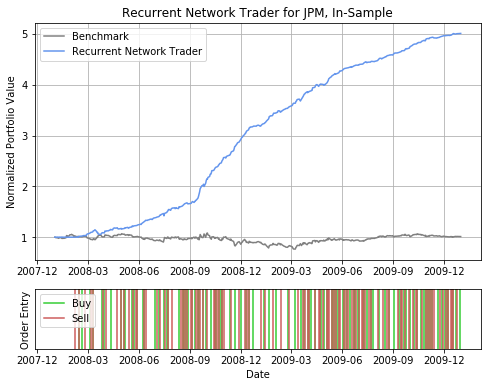

(483, 3)
(477, 7, 3)
[[0.96492083 0.29119245 2.24479504]
 [0.9614711  0.27338783 2.26525054]
 [0.92077001 0.05260792 2.34516077]
 [0.92545722 0.08950818 2.38931351]
 [0.91850735 0.05414153 2.38526828]
 [0.94224172 0.17565405 2.30696255]
 [0.96043219 0.26656688 2.18138008]]
[[1.03237332 0.69709192 1.67112423]
 [1.03217683 0.6977744  1.66134455]
 [1.06156627 0.88028635 1.6633247 ]
 [1.05716257 0.87894095 1.56199735]
 [1.0330542  0.74633971 1.39889412]
 [1.01594947 0.6332176  1.25466045]
 [1.03237789 0.84403177 0.99335602]]


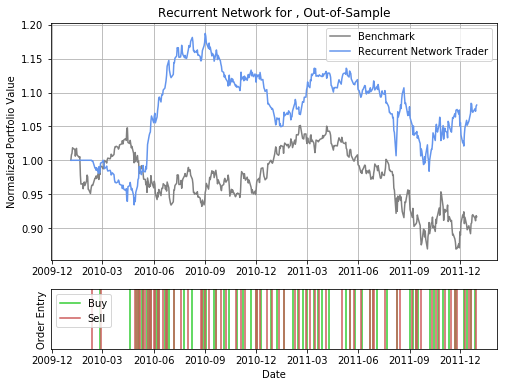

In [14]:
#generate trade in-sample
df_trades = rnnt.generate_trades(in_sd, in_ed) 

plot_title = 'Recurrent Network Trader for {}, In-Sample'.format(ticker)
algorithm_title = 'Recurrent Network Trader'
btr.backtest(df_trades, plot_title, algorithm_title, benchmark=True, plot_size=(8,6))

#out-of-sample
start_date = pd.datetime(2012,1,1)
end_date = pd.datetime(2012,12,31)

#generate trade out-of-sample
df_trades = rnnt.generate_trades(out_sd, out_ed) 
plot_title = 'Recurrent Network for , Out-of-Sample'.format(ticker)
algorithm_title = 'Recurrent Network Trader'
btr.backtest(df_trades, plot_title, algorithm_title, benchmark=True, plot_size=(8,6)) 